In [1]:
!pip install counter

In [13]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import nltk
import warnings
warnings.filterwarnings('ignore')

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Shailendra
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
#text=open('D:/New Folder (2)/read.txt','r',encoding='utf-8')
text=open('D:/New Folder (2)/read.txt', encoding="utf-8").read()

lower_case=text.lower()

#str.maketrans removes any punctuations

cleaned_text=lower_case.translate(str.maketrans('','',string.punctuation))

#using word_tokenize to tokenize sentence into words

tokenized_words=word_tokenize(cleaned_text,"english")


In [16]:
#removing stop words

final_words=[]

for word in tokenized_words:
    if word in stopwords.words('english'):
        final_words.append(word)

In [17]:
lemma_words=[]

for word in final_words:
    word=WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [18]:
emotion_list=[]

with open('D:/New Folder (2)/emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion=clear_line.split(':')
        
        if word in lemma_words:
            emotion_list.append(emotion)
            
print("people emotions from the text\n", emotion_list,'\n,\n')

w=Counter(emotion_list)
print("count of each emotion \n",w)
            
        

people emotions from the text
 [] 
,

count of each emotion 
 Counter()


In [19]:
clear_line


' worked up: angry'

In [20]:
# test how sentiment nalysis works

sia=SentimentIntensityAnalyzer()

test_sent='Corono is a bad virus and killed many people'
sent='House of cards is a awesome series, one of my favourite'

print(sia.polarity_scores(sent))

{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}


In [19]:
def sentiment_analysis(sentiment_text):
    
    score=SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg']>score['pos']:
        print('\n     *************Negative Sentiment************')
        
    elif score['neg']<score['pos']:
        print('\n****** positive sentiment********')
        
    else:
        print("neutral sentiment")
    

In [20]:
sentiment_analysis(cleaned_text)


****** positive sentiment********


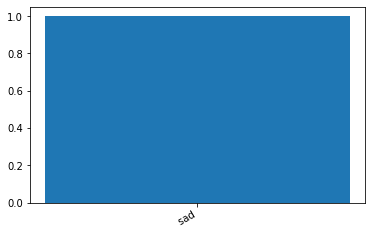

In [21]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()